In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import sqrt

import keila_wrangle as w

In [2]:
df = w.read_wine()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low


In [3]:

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low


In [4]:
train, validate, test = w.clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [5]:
# splitting into x and y
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3782, 15)
validate -> (1261, 15)
test -> (1261, 15)


In [6]:
# scaling data
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

1. What is the distribution of each of the variables?

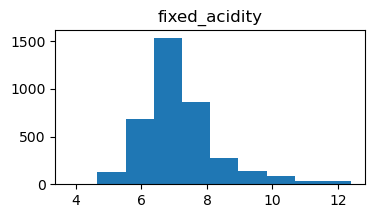

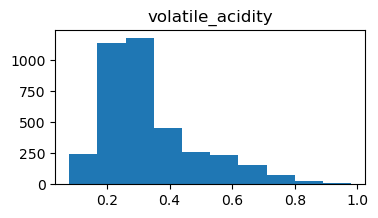

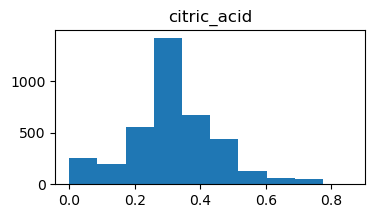

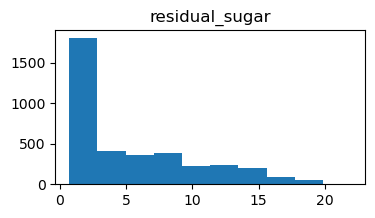

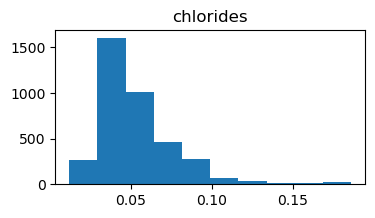

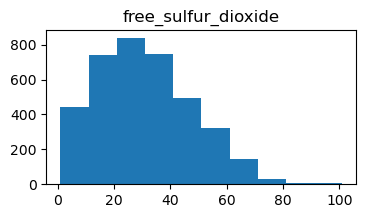

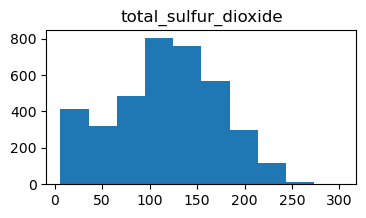

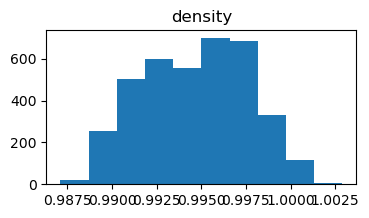

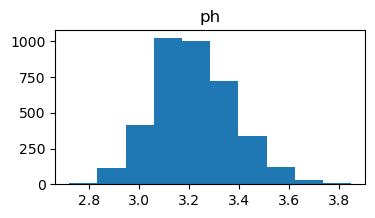

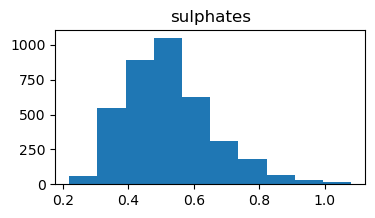

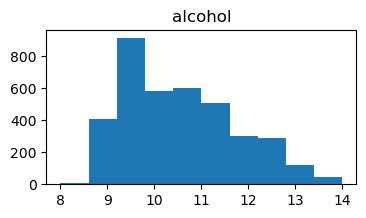

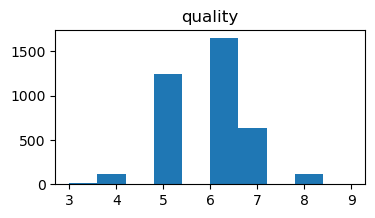

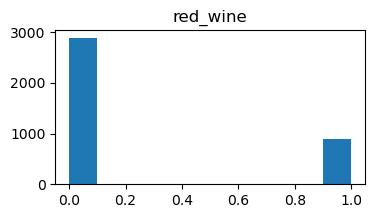

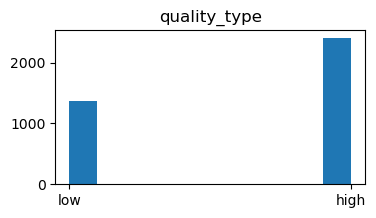

In [7]:
for col in train.drop(columns='wine_type').columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

conclusion:

    * normal dist -- citrc_acid, density, ph, quality
    
    * skews to the right -- red_wine, alcohol, sulphates, total_sulfur_dioxide,  free_sulfur_dioxide, cholrides, residual_sugar, volatile_acidity, fixed_acidity
    
    * The sample has more white wine than red

exploratory Questions:
    
    - Is there a relationship between citric acid and quality?
    - Is there a relationship between density and quality?
    - Is there a relationship between ph and quality?
    
    - residual suger and density 
    

 # Statistical testing 

In [8]:
def corr_test(train, x_col, y_col):
    corr, p = stats.pearsonr(train[x_col], train[y_col])
    if p < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject null hypothesis")
    return corr, p


In [9]:
# confidence level = 95% 
alpha = 0.05

$H_o$: There is no linear correlation between 'fixed_acidity' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'fixed_acidity' and the 'quality' on the wine.

In [10]:
corr_test(train, "fixed_acidity", "quality")

We reject the null hypothesis


(-0.07827511127209155, 1.4387175286092745e-06)

In [11]:
train.fixed_acidity.count() # assume normal

3782

$H_o$: There is no linear correlation between 'volatile_acidity' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'volatile_acidity' and the 'quality' on the wine.

In [12]:
corr_test(train, "quality", "volatile_acidity")

We reject the null hypothesis


(-0.25265237698603427, 3.6861081532008405e-56)

$H_o$: There is no linear correlation between 'citric_acid' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'citric_acid' and the 'quality' on the wine.

In [13]:
corr_test(train, "quality", "citric_acid")

We reject the null hypothesis


(0.09185134519020383, 1.5246273425609698e-08)

$H_o$: There is no linear correlation between 'residual_sugar' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'residual_sugar' and the 'quality' on the wine.

In [14]:
corr_test(train, "quality", "residual_sugar")

We reject the null hypothesis


(-0.04557102612604648, 0.005062099302586473)

$H_o$: There is no linear correlation between 'chlorides' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'chlorides' and the 'quality' on the wine.

In [15]:
corr_test(train, "quality", "chlorides")

We reject the null hypothesis


(-0.22955837695216097, 2.0617450801145316e-46)

$H_o$: There is no linear correlation between 'free_sulfur_dioxide' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'free_sulfur_dioxide' and the 'quality' on the wine.

In [16]:
corr_test(train, "quality", "free_sulfur_dioxide")

We reject the null hypothesis


(0.06847518237771702, 2.5017709828608667e-05)

$H_o$: There is no linear correlation between 'total_sulfur_dioxide' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'total_sulfur_dioxide' and the 'quality' on the wine.

In [17]:
corr_test(train, "quality", "total_sulfur_dioxide")

We reject the null hypothesis


(-0.04342487206718959, 0.007564402019911827)

$H_o$: There is no linear correlation between 'density' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'density' and the 'quality' on the wine.

In [18]:
corr_test(train, "quality", "density")

We reject the null hypothesis


(-0.32055700121430664, 4.0411344714683615e-91)

$H_o$: There is no linear correlation between 'ph' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'ph' and the 'quality' on the wine.

In [19]:
corr_test(train, "quality", "ph")

We fail to reject null hypothesis


(0.022160677839622077, 0.1730232866214007)

$H_o$: There is no linear correlation between 'sulphates' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'sulphates' and the 'quality' on the wine.

In [20]:
corr_test(train, "quality", "sulphates")

We reject the null hypothesis


(0.0578266829819311, 0.00037365329475365247)

$H_o$: There is no linear correlation between 'alcohol' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'alcohol' and the 'quality' on the wine.

In [21]:
corr_test(train, "quality", "alcohol")

We reject the null hypothesis


(0.4511831209713698, 4.2781514190354915e-189)

$H_o$: There is no linear correlation between 'wine_type' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'wine_type' and the 'quality' on the wine.

In [22]:
corr_test(train, "quality", "red_wine")

We reject the null hypothesis


(-0.11375602349563708, 2.2792373411285852e-12)

train.columns

In [23]:
def ind_test(samp1, samp2, alpha=0.05):
    '''
    Completes an sample t-test, based on the null hypothesis less than
    '''
    t, p = stats.ttest_ind(samp1, samp2, equal_var=False)

    if p/2 < alpha and t > 0 :
        print(f'''Reject the null hypothesis: Sufficient''')
    else:
        print(f''' Fail to reject the null: Insufficient evidence''')
    print(f" p-value: {p} , t: {t}")



In [24]:
# Does low quality wine have more residual suger or less when compared to high quality wine?

$H_o$: Mean of 'residual_sugar' for low quality wines <= Mean of 'residual_sugar' for high quality wines

$H_a$: Mean of 'residual_sugar' for low quality wines > Mean of 'residual_sugar' for high quality wines

In [27]:
low_quality = train[train.quality_type == 'low'].residual_sugar

high_quality = train[train.quality_type == 'high'].residual_sugar

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


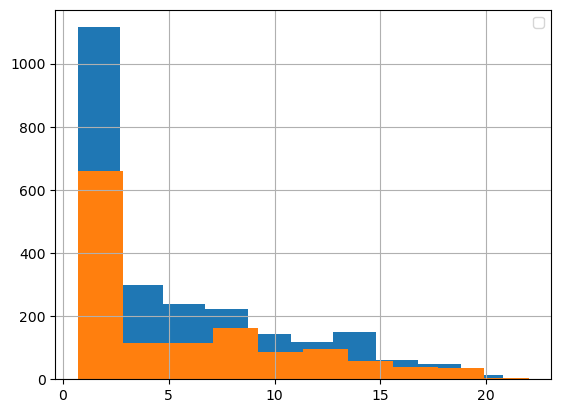

In [31]:
high_quality.hist()
low_quality.hist()
plt.legend()

In [74]:
def sugar_barplot(df):
    '''
    This function creates a custom bar chart for comparing homes with pools and homes without pools
    '''
    fig, ax =plt.subplots()
    # creat average line
  
    
    plt.title("Low Quality Wine has More Sugar")
    sns.barplot(x="quality_type", y="residual_sugar", data=df, hue='wine_type')
    plt.xlabel("Quality")
    plt.ylabel("Amount of Sugar")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    property_value_average = df.residual_sugar.mean()
    plt.axhline(property_value_average, label="Residual Sugar Average", color='DarkSlateBlue')
    plt.legend(loc='upper right')
    plt.show()

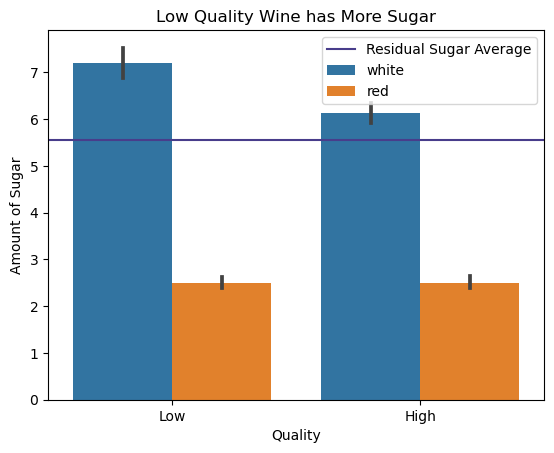

In [75]:
sugar_barplot(train)

In [36]:
low_quality.var(), high_quality.var()

(24.415103338755117, 21.261813533379094)

In [40]:
ind_test(low_quality, high_quality)

Reject the null hypothesis: Sufficient
 p-value: 0.02361564235607467 , t: 2.264612071433778


$H_o$: Mean of 'density' for low quality wines <= Mean of 'residual_sugar' for high quality wines

$H_a$: Mean of 'density' for low quality wines > Mean of 'residual_sugar' for high quality wines

In [41]:
low_quality_2 = train[train.quality_type == 'low'].density

high_quality_2 = train[train.quality_type == 'high'].density

In [54]:
def density_barplot(df):
    '''
    This function creates a custom bar chart for comparing homes with pools and homes without pools
    '''
    fig, ax =plt.subplots()
    # creat average line
  
    
    plt.title("Low Quality vs. High Quality ")
    sns.barplot(x="quality_type", y="density", data=df)
    plt.xlabel("Quality")
    plt.ylabel("Amount of Density")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    property_value_average = df.density.mean()
    plt.axhline(property_value_average, label="Density Average", color='DarkSlateBlue')
    plt.legend()
    plt.show()

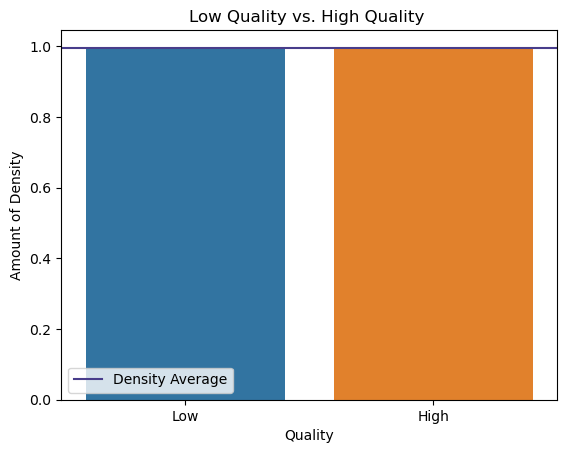

In [55]:
density_barplot(train)

In [56]:
ind_test(low_quality_2, high_quality_2)

Reject the null hypothesis: Sufficient
 p-value: 1.8261051492646606e-77 , t: 19.124709724841292


<AxesSubplot:>

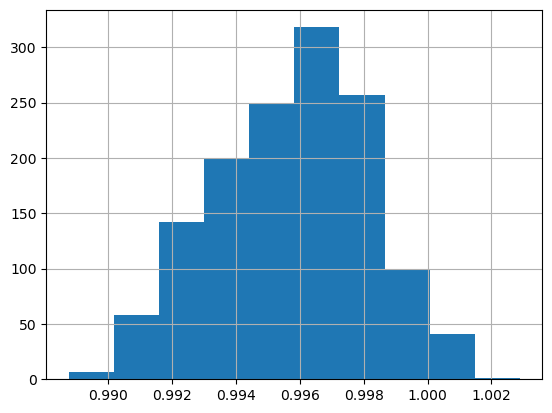

In [57]:
low_quality_2.hist()

<AxesSubplot:>

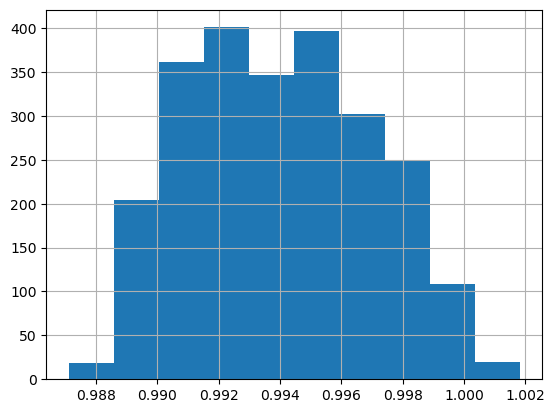

In [58]:
high_quality_2.hist()

In [64]:
red = train[train['wine_type'] == "red"]
white = train[train['wine_type'] == "white"]

$H_o$: wine type is independent of quality type

$H_a$: wine type is dependent of quality type

In [67]:
observed = pd.crosstab(train.wine_type, train.quality_type)

In [68]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p


4.560987566222353e-13

In [69]:
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    if p < alpha:
        print(f'There exists some relationship between {group1} and the {group2}. (p-value: {p})')
    else:
        print(f'There is not a significant relationship between {group1} and {group2}. (p-value: {p})')

In [71]:
eval_results(p, alpha, train.wine_type, train.quality_type)

There exists some relationship between 1961    white
2604    white
890     white
3024    white
925       red
        ...  
1401    white
2088    white
4508    white
4740    white
1028      red
Name: wine_type, Length: 3782, dtype: object and the 1961     low
2604    high
890     high
3024    high
925     high
        ... 
1401    high
2088    high
4508     low
4740     low
1028    high
Name: quality_type, Length: 3782, dtype: object. (p-value: 4.560987566222353e-13)
